In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')


In [2]:
customer_df = pd.read_csv('../data/processed/customer_features.csv')

print(f"Total customers: {len(customer_df)}")
print(f"Churn rate: {customer_df['Churn'].mean()*100:.2f}%")

customer_df.head()


Total customers: 3083
Churn rate: 38.14%


,CustomerID,Churn,Recency,Frequency,TotalSpent,AvgOrderValue,TotalItems,UniqueProducts,CustomerLifetimeDays,Purchases_Last30Days,...,ProductsPerOrder,ItemsPerProduct,ProductDiversityRatio,RecencyToLifetimeRatio,Recent30to60Ratio,Recent60to90Ratio,SpendPerOrder,SpendPerProduct,FrequencyToLifetimeRatio,ItemsPerDay
0,16384,0,143,1,392.10,17.047826,198,23,0,0.0,...,11.500000,8.250000,0.115578,143.000000,0.0,0.0,196.050000,16.337500,1.000000,198.000000
1,16385,0,37,2,239.47,7.043235,148,33,208,0.0,...,11.000000,4.352941,0.221477,0.177033,0.0,0.5,79.823333,7.043235,0.009569,0.708134
2,16386,0,133,1,61.10,15.275000,26,4,0,0.0,...,2.000000,5.200000,0.148148,133.000000,0.0,0.0,30.550000,12.220000,1.000000,26.000000
3,16387,1,202,1,94.36,23.590000,44,4,0,0.0,...,2.000000,8.800000,0.088889,202.000000,0.0,0.0,47.180000,18.872000,1.000000,44.000000
4,16389,0,84,2,496.05,35.432143,223,14,77,0.0,...,4.666667,14.866667,0.062500,1.076923,0.0,0.0,165.350000,33.070000,0.025641,2.858974


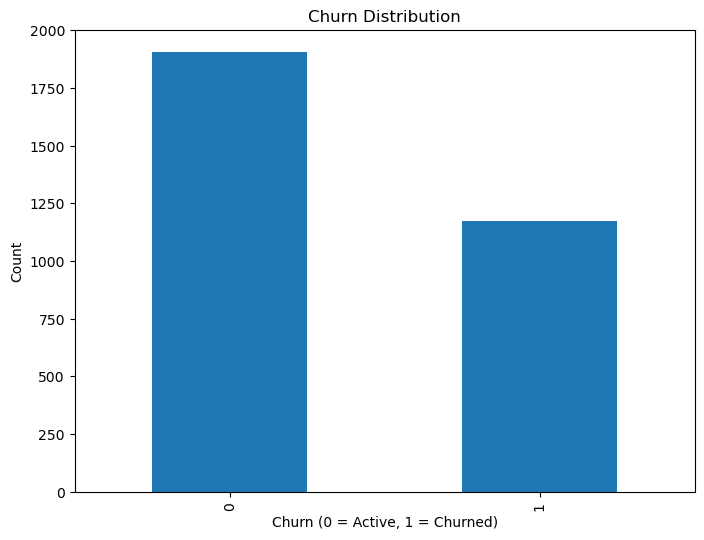

In [3]:
plt.figure(figsize=(8,6))
customer_df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = Active, 1 = Churned)')
plt.ylabel('Count')
plt.savefig('../visualizations/01_churn_distribution.png')
plt.show()


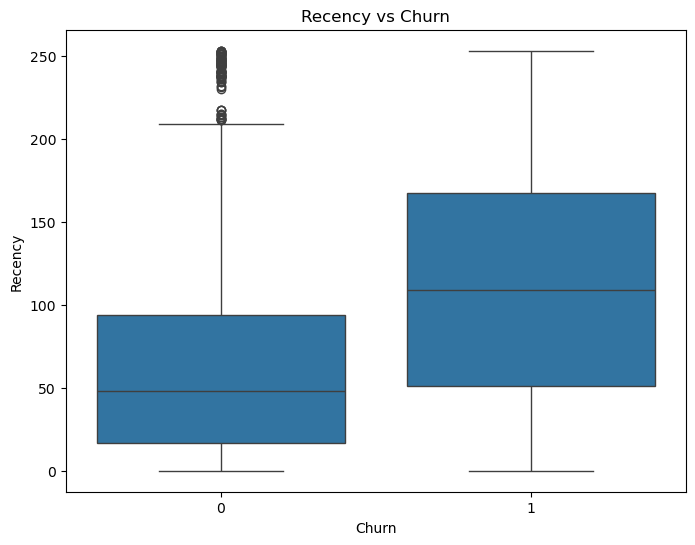

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Recency', data=customer_df)
plt.title('Recency vs Churn')
plt.savefig('../visualizations/02_recency_vs_churn.png')
plt.show()


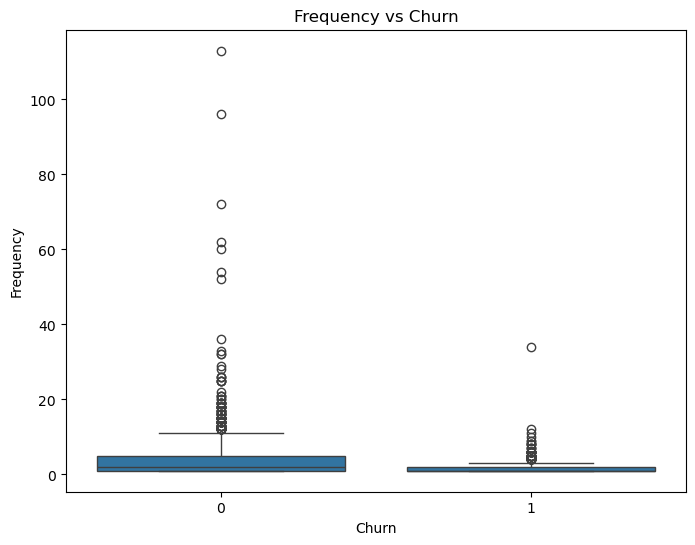

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Frequency', data=customer_df)
plt.title('Frequency vs Churn')
plt.savefig('../visualizations/03_frequency_vs_churn.png')
plt.show()


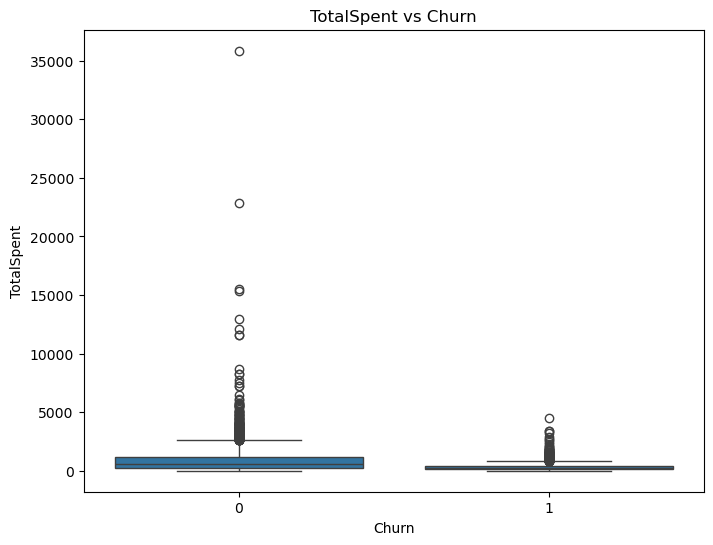

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='TotalSpent', data=customer_df)
plt.title('TotalSpent vs Churn')
plt.savefig('../visualizations/04_totalspent_vs_churn.png')
plt.show()


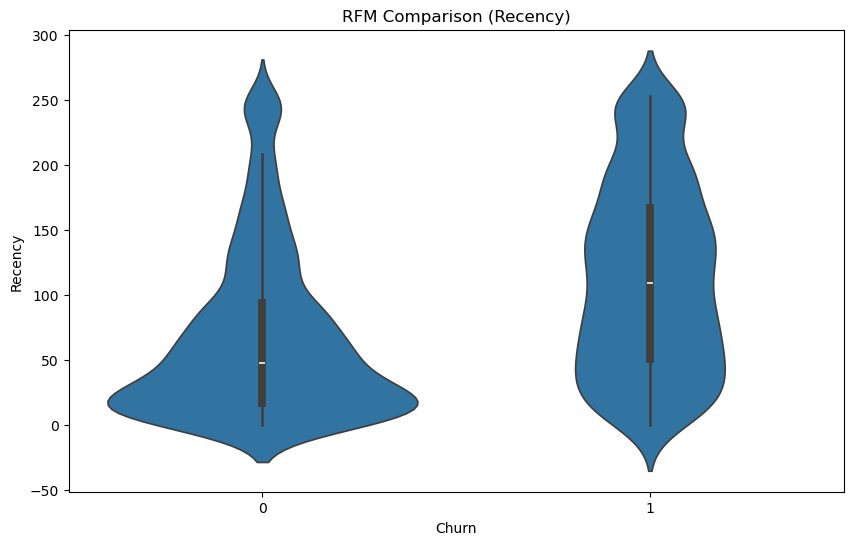

In [7]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Churn', y='Recency', data=customer_df)
plt.title('RFM Comparison (Recency)')
plt.savefig('../visualizations/05_rfm_violin.png')
plt.show()


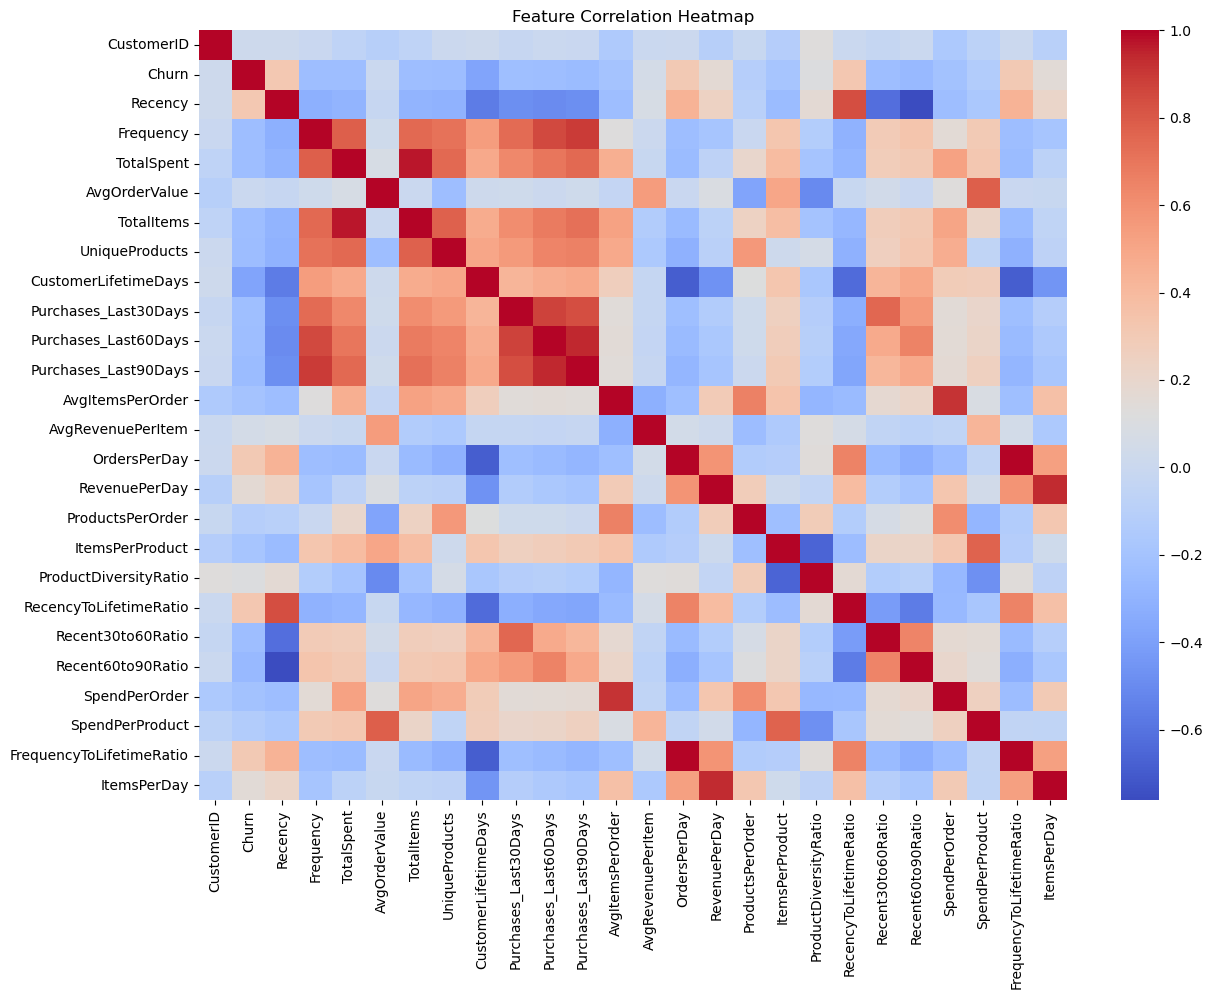

In [8]:
plt.figure(figsize=(14,10))
corr = customer_df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('../visualizations/06_correlation_heatmap.png')
plt.show()


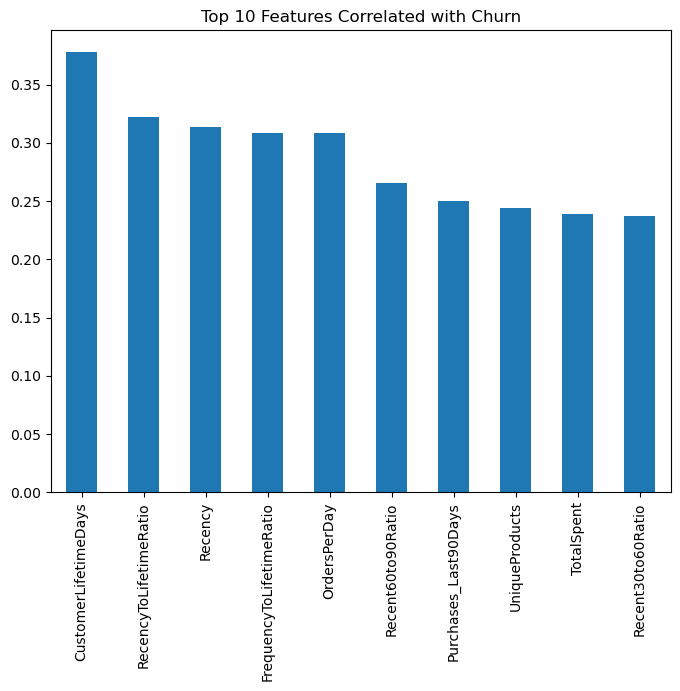

In [9]:
churn_corr = corr['Churn'].abs().sort_values(ascending=False)[1:11]

plt.figure(figsize=(8,6))
churn_corr.plot(kind='bar')
plt.title('Top 10 Features Correlated with Churn')
plt.savefig('../visualizations/07_top_churn_correlations.png')
plt.show()


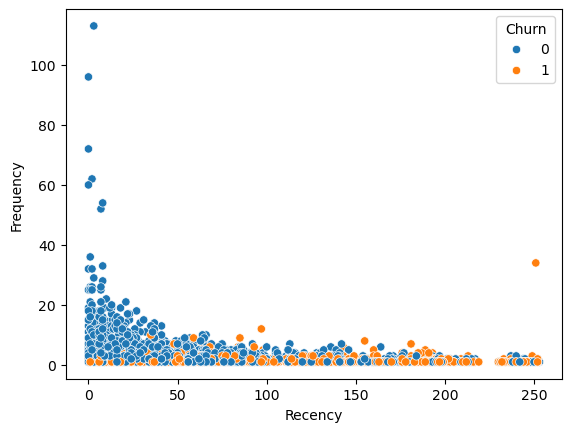

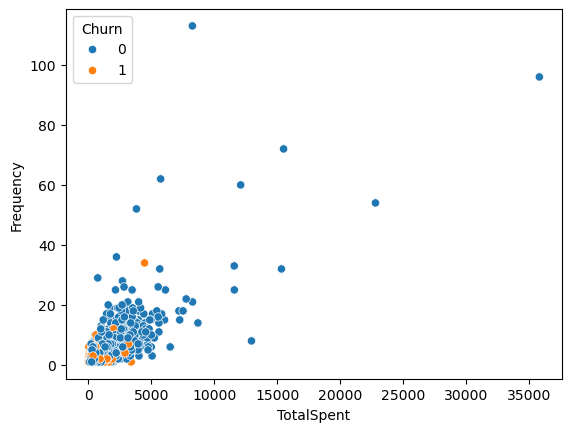

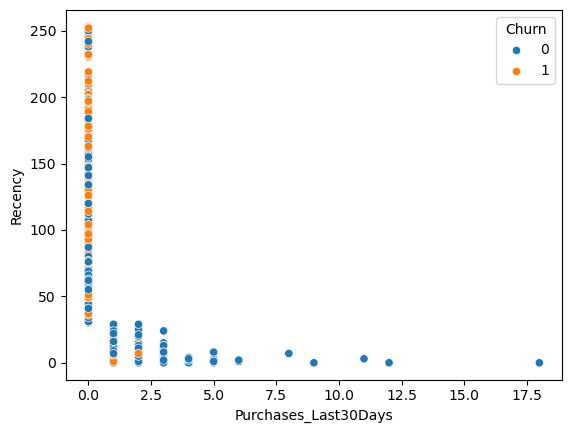

In [10]:
sns.scatterplot(x='Recency', y='Frequency', hue='Churn', data=customer_df)
plt.savefig('../visualizations/08_recency_frequency_scatter.png')
plt.show()

sns.scatterplot(x='TotalSpent', y='Frequency', hue='Churn', data=customer_df)
plt.savefig('../visualizations/09_spent_frequency_scatter.png')
plt.show()

sns.scatterplot(x='Purchases_Last30Days', y='Recency', hue='Churn', data=customer_df)
plt.savefig('../visualizations/10_recent_activity_scatter.png')
plt.show()


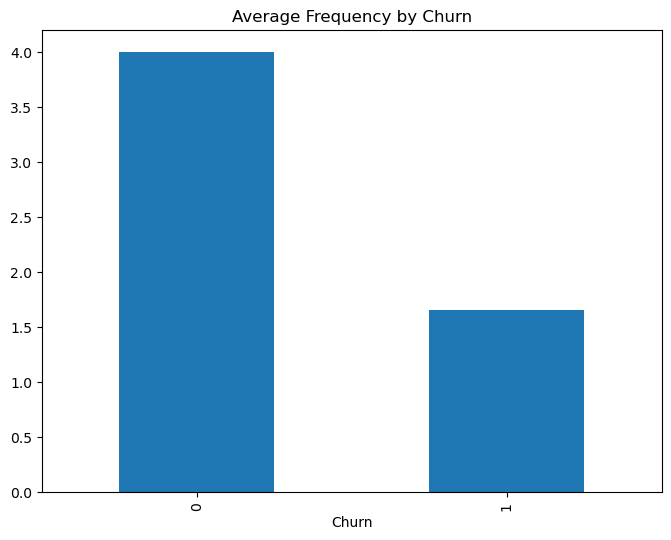

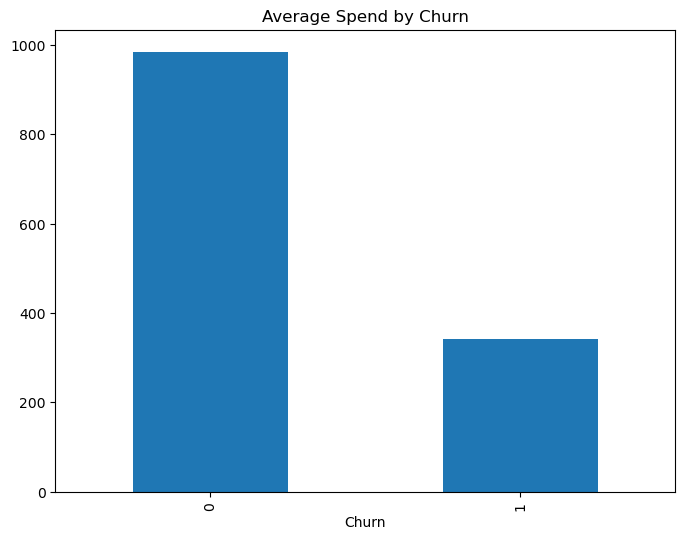

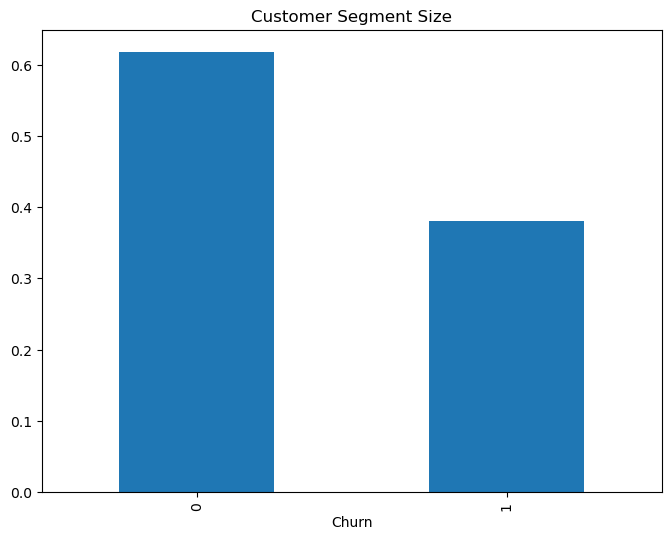

In [11]:
plt.figure(figsize=(8,6))
customer_df.groupby('Churn')['Frequency'].mean().plot(kind='bar')
plt.title('Average Frequency by Churn')
plt.savefig('../visualizations/11_frequency_by_churn.png')
plt.show()

plt.figure(figsize=(8,6))
customer_df.groupby('Churn')['TotalSpent'].mean().plot(kind='bar')
plt.title('Average Spend by Churn')
plt.savefig('../visualizations/12_spend_by_churn.png')
plt.show()

plt.figure(figsize=(8,6))
customer_df['Churn'].value_counts(normalize=True).plot(kind='bar')
plt.title('Customer Segment Size')
plt.savefig('../visualizations/13_segment_distribution.png')
plt.show()


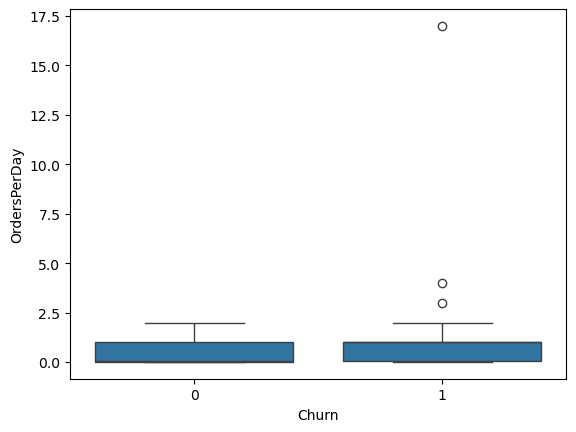

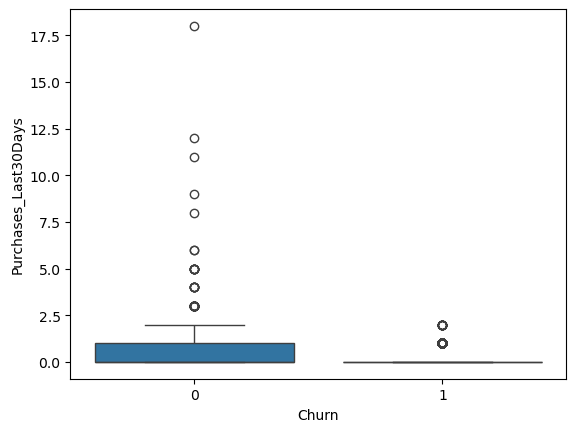

In [12]:
sns.boxplot(x='Churn', y='OrdersPerDay', data=customer_df)
plt.savefig('../visualizations/14_velocity_vs_churn.png')
plt.show()

sns.boxplot(x='Churn', y='Purchases_Last30Days', data=customer_df)
plt.savefig('../visualizations/15_recent30_vs_churn.png')
plt.show()


In [13]:
churned = customer_df[customer_df['Churn'] == 1]['Recency']
active = customer_df[customer_df['Churn'] == 0]['Recency']

t_stat, p_value = stats.ttest_ind(churned, active)
print(f"T-test Recency: t={t_stat:.4f}, p={p_value:.4f}")


T-test Recency: t=18.3595, p=0.0000
